In [10]:
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
!pip install pandas

     --------------------------------------- 11.3/11.3 MB 27.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#Creacióm de grafo dirigido
G= nx.Graph()

G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A','B'),
                  ('A','D'),
                  ('B','C'),
                  ('C','E'),
                  ('D','E')])


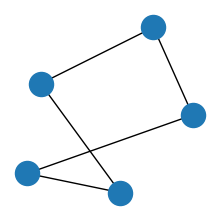

In [11]:
plt.figure(figsize=(2,2))
nx.draw_kamada_kawai(G)

In [12]:
G= nx.DiGraph()

G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A','B'),
                  ('A','D'),
                  ('B','C'),
                  ('C','E'),
                  ('D','E')])

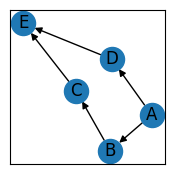

In [13]:
plt.figure(figsize=(2,2))
nx.draw_networkx(G,arrows=True, arrowstyle='-|>')

In [4]:
import pandas as pd

In [5]:
df=pd.DataFrame(index=['A','B','C','D','E'],columns=['A','B','C','D','E'])
df

,A,B,C,D,E
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN


In [6]:
df.loc['A']['B']=2.1
df.loc['B']['A']=8.6
df.loc['A']['D']=7.5
df.loc['D']['A']=6.6
df.loc['D']['E']=0.8
df.loc['E']['D']=4.2
df.loc['E']['C']=1.1
df.loc['C']['E']=3.56
df.loc['C']['B']=7.3
df.loc['B']['C']=10.7




C:\Users\mafig\AppData\Local\Temp\ipykernel_19288\17120095.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc['A']['B']=2.1
C:\Users\mafig\AppData\Local\Temp\ipykernel_19288\17120095.py:2: FutureWarning: ChainedAssignmentError: behav

In [26]:
df

,A,B,C,D,E
A,NaN,2.2,NaN,7.5,NaN
B,8.6,NaN,10.7,NaN,NaN
C,NaN,7.3,NaN,NaN,3.56
D,6.6,NaN,NaN,NaN,0.8
E,NaN,NaN,1.1,4.2,NaN


In [7]:
df.fillna(0,inplace=True)

C:\Users\mafig\AppData\Local\Temp\ipykernel_19288\1840858203.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0,inplace=True)


In [37]:
df

,A,B,C,D,E
A,0.0,2.1,0.0,7.5,0.00
B,8.6,0.0,10.7,0.0,0.00
C,0.0,7.3,0.0,0.0,3.56
D,6.6,0.0,0.0,0.0,0.80
E,0.0,0.0,1.1,4.2,0.00


In [33]:
import numpy as np

In [35]:
# otra forma
data=np.zeros([5,5])
df=pd.DataFrame(data,index=['A','B','C','D','E'],columns=['A','B','C','D','E'])

df.loc['A']['B']=2.2
df.loc['B']['A']=8.6
df.loc['A']['D']=7.5
df.loc['D']['A']=6.6
df.loc['D']['E']=0.8
df.loc['E']['D']=4.2
df.loc['E']['C']=1.1
df.loc['C']['E']=3.56
df.loc['C']['B']=7.3
df.loc['B']['C']=10.7

C:\Users\V304-16\AppData\Local\Temp\ipykernel_5000\187023412.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc['A']['B']=2.2
C:\Users\V304-16\AppData\Local\Temp\ipykernel_5000\187023412.py:6: FutureWarning: ChainedAssignmentError: b

,A,B,C,D,E
A,0.0,2.2,0.0,7.5,0.00
B,8.6,0.0,10.7,0.0,0.00
C,0.0,7.3,0.0,0.0,3.56
D,6.6,0.0,0.0,0.0,0.80
E,0.0,0.0,1.1,4.2,0.00


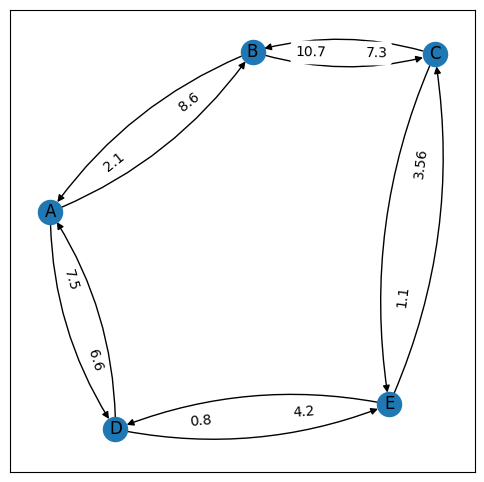

In [43]:
G=nx.from_pandas_adjacency(df,create_using=nx.DiGraph())

plt.figure(figsize=(6,6))
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=True,arrows=True, arrowstyle='-|>',connectionstyle='arc3,rad=0.15')

pesos=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,pesos, label_pos=0.3);

In [44]:
#calcular cuartiles y selccionar umbral correspondiente a 50%, mapa de calor, mapa de calor con umbral
df.describe()

,A,B,C,D,E
count,5.000000,5.000000,5.00000,5.000000,5.000000
mean,3.040000,1.880000,2.36000,2.340000,0.872000
std,4.222322,3.163384,4.68647,3.409985,1.542051
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6.600000,2.100000,1.10000,4.200000,0.800000
max,8.600000,7.300000,10.70000,7.500000,3.560000


In [51]:
df.quantile(q=[ 0.25 , 0.5 , 0.75 ], axis= 0 , numeric_only= True )

,A,B,C,D,E
0.25,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0
0.75,6.6,2.1,1.1,4.2,0.8


In [2]:
import seaborn as sns

NameError: name 'plt' is not defined

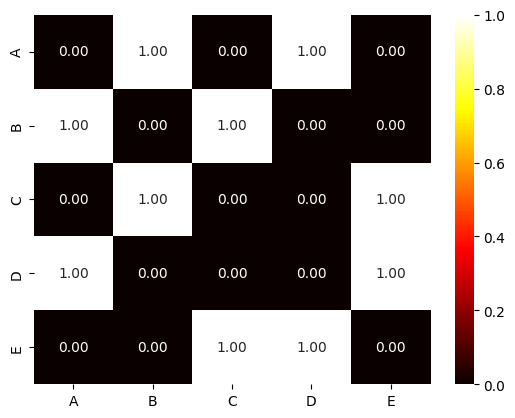

In [8]:
sns.heatmap(df>0,annot=True,
              cmap='hot', fmt='.2f')
plt.show()